In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from collections import Counter

In [3]:
sns.set(color_codes=True)

In [4]:
    df = pd.read_csv("train.csv")
    dfTest = pd.read_csv("test.csv")


In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_test = dfTest.values

In [7]:
from sklearn.preprocessing import LabelEncoder
classLbl = LabelEncoder()
y = classLbl.fit_transform(y)

# Version 1

In [78]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X, X_test = std.fit_transform(X), std.fit_transform(X_test)

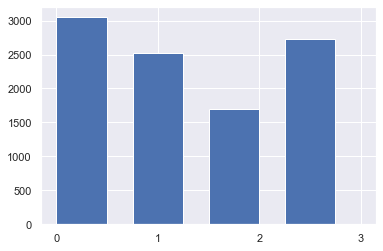

In [79]:
hist(y, bins = 4, width = 0.5, range = (0,3), align = 'mid')
xticks([0,1,2,3]);

In [80]:
print("Current Distribution of classes  - ", Counter(y))

Current Distribution of classes  -  Counter({0: 3049, 3: 2729, 1: 2527, 2: 1695})


In [81]:
from imblearn.over_sampling import ADASYN

In [82]:
ada = ADASYN(sampling_strategy='minority', random_state=42)
X_res, y_res = ada.fit_resample(X, y)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2)

In [84]:
Counter(y_res)

Counter({1: 2527, 2: 2931, 3: 2729, 0: 3049})

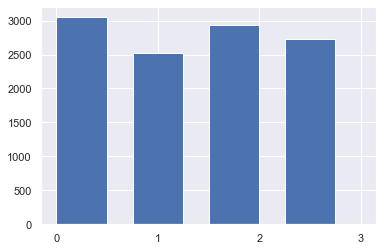

In [85]:
hist(y_res, bins = 4, width = 0.5, range = (0,3), align = 'mid')
xticks([0,1,2,3]);

In [86]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [87]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [88]:
y_pred_val = model.predict(X_val)
f1_val = f1_score(y_val, y_pred_val, average='weighted')

In [89]:
f1_val

0.8504369534870182

In [90]:
y_pred_test = model.predict(X_test)
y_pred_test = classLbl.inverse_transform(y_pred_test)
df_res = pd.DataFrame()
df_res['Accident_ID'] = dfTest['Accident_ID']
df_res['Severity'] = y_pred_test

In [74]:
X.shape

(10000, 11)

In [75]:
X_test.shape

(2500, 10)

In [92]:
df_res[['Accident_ID', 'Severity']].to_csv('predictions.csv', encoding='utf-8', index = False)

# Version 2

In [1]:
#so I also created an xGboost model... achieved 85.09 score....
#i encoded the categorical features like 'Violations', 'Accident_Type_Code', 'Total_Safety_Complaints', 'Days_Since_Inspection' using onehot encoder...

In [5]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [7]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [19]:
#Assesing Feature importance


TypeError: append() got an unexpected keyword argument 'axis'